# 유방암 데이터

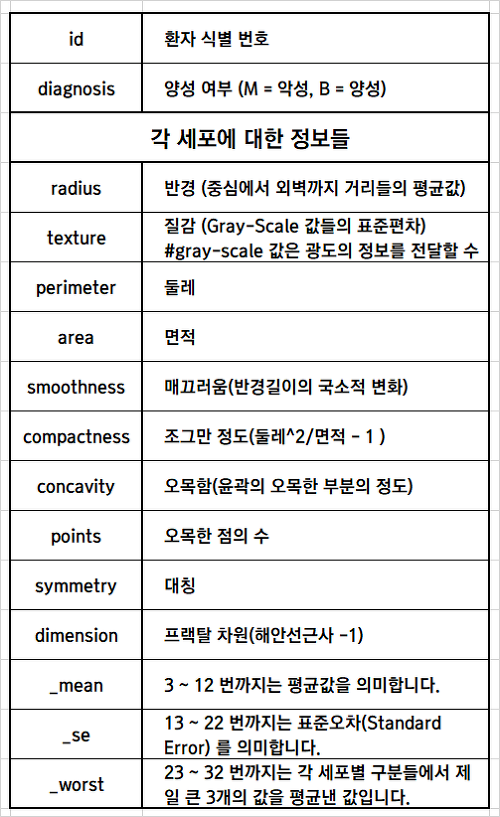

In [45]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

## 데이터 불러오기

In [4]:
df = pd.read_csv("../data/wisc_bc_data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [ ]:
df['diagnosis'].value_counts()

## 데이터 확인

In [6]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [7]:
# 결측치 확인
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

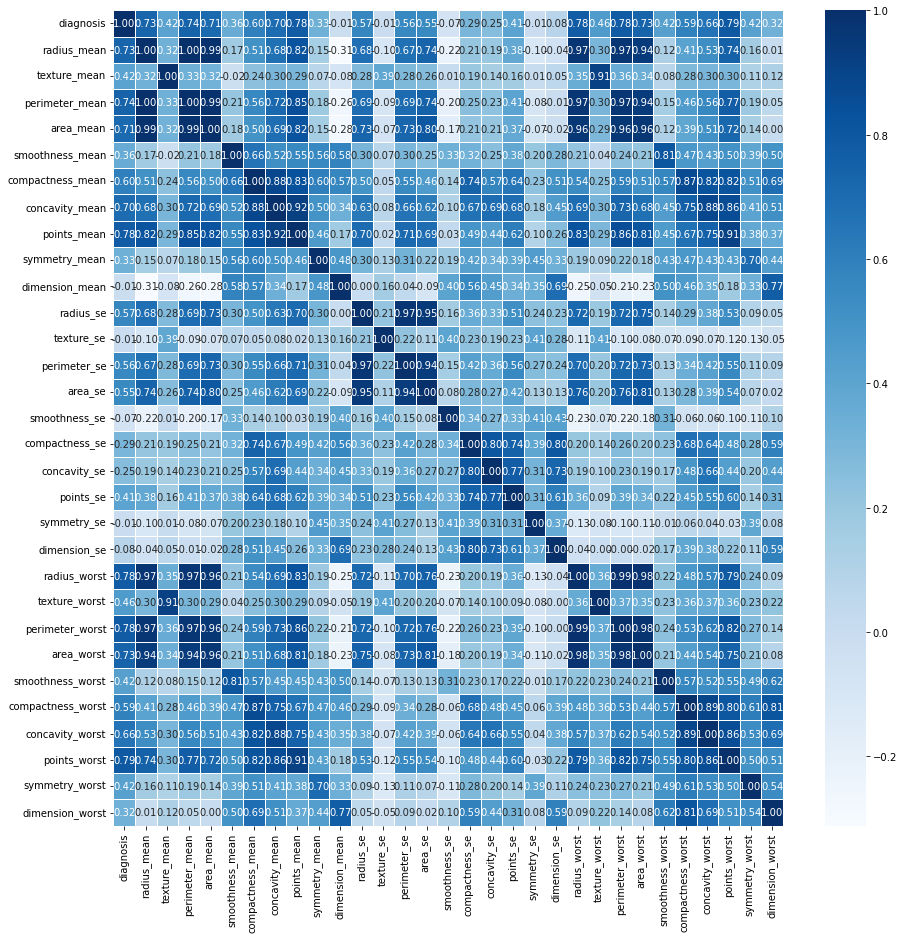

In [14]:
# 변수 간 상관계수 확인
plt.figure(figsize = (15,15))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

## 데이터 전처리

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [8]:
# id 삭제
df.drop('id', axis = 1, inplace = True)

In [22]:
# diagnosis와 상관계수가 낮은 변수 제거
# smoothness_mean, symmetry_mean, dimension_mean, texture_se, smoothness_se, symmetry_se, dimension_se, dimension_worst
# symmetry_worst, smoothness_worst
df = df[['diagnosis', 'radius_mean', 'perimeter_mean','area_mean', 'compactness_mean', 
         'concavity_mean','points_mean', 'radius_se','perimeter_se', 'area_se', 'radius_worst', 
         'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'points_worst']]

In [24]:
# 변수 간 상관계수 높은 변수 제거 
# radius_mean, area_mean
df = df[['diagnosis', 'perimeter_mean', 'compactness_mean', 
         'concavity_mean','points_mean', 'radius_se','perimeter_se', 'area_se', 'radius_worst', 
         'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'points_worst']]

In [25]:
df.corr()

,diagnosis,perimeter_mean,compactness_mean,concavity_mean,points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,points_worst
diagnosis,1.000000,0.742636,0.596534,0.696360,0.776614,0.567134,0.556141,0.548236,0.776454,0.456903,0.782914,0.733825,0.590998,0.659610,0.793566
perimeter_mean,0.742636,1.000000,0.556936,0.716136,0.850977,0.691765,0.693135,0.744983,0.969476,0.303038,0.970387,0.941550,0.455774,0.563879,0.771241
compactness_mean,0.596534,0.556936,1.000000,0.883121,0.831135,0.497473,0.548905,0.455653,0.535315,0.248133,0.590210,0.509604,0.865809,0.816275,0.815573
concavity_mean,0.696360,0.716136,0.883121,1.000000,0.921391,0.631925,0.660391,0.617427,0.688236,0.299879,0.729565,0.675987,0.754968,0.884103,0.861323
points_mean,0.776614,0.850977,0.831135,0.921391,1.000000,0.698050,0.710650,0.690299,0.830318,0.292752,0.855923,0.809630,0.667454,0.752399,0.910155
radius_se,0.567134,0.691765,0.497473,0.631925,0.698050,1.000000,0.972794,0.951830,0.715065,0.194799,0.719684,0.751548,0.287103,0.380585,0.531062
perimeter_se,0.556141,0.693135,0.548905,0.660391,0.710650,0.972794,1.000000,0.937655,0.697201,0.200371,0.721031,0.730713,0.341919,0.418899,0.554897
area_se,0.548236,0.744983,0.455653,0.617427,0.690299,0.951830,0.937655,1.000000,0.757373,0.196497,0.761213,0.811408,0.283257,0.385100,0.538166
radius_worst,0.776454,0.969476,0.535315,0.688236,0.830318,0.715065,0.697201,0.757373,1.000000,0.359921,0.993708,0.984015,0.475820,0.573975,0.787424
texture_worst,0.456903,0.303038,0.248133,0.299879,0.292752,0.194799,0.200371,0.196497,0.359921,1.000000,0.365098,0.345842,0.360832,0.368366,0.359755


In [26]:
# 종속변수 결과 값 변경 
encoder = LabelEncoder()
encoder.fit(df['diagnosis'])
df['diagnosis'] = encoder.transform(df['diagnosis'])

In [27]:
df.head(10)

,diagnosis,perimeter_mean,compactness_mean,concavity_mean,points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,points_worst
0,0,78.85,0.06981,0.03987,0.03700,0.2360,1.670,17.43,13.50,15.64,86.97,549.1,0.1266,0.12420,0.09391
1,0,69.28,0.11470,0.06387,0.02642,0.4505,3.430,27.10,11.88,22.94,78.28,424.8,0.2515,0.19160,0.07926
2,0,70.92,0.07804,0.03046,0.02480,0.1967,1.342,13.54,12.41,26.44,79.93,471.4,0.1482,0.10670,0.07431
3,0,73.00,0.11360,0.04635,0.04796,0.3384,1.851,26.33,11.92,15.77,76.53,434.0,0.1822,0.08669,0.08611
4,0,97.65,0.06934,0.03393,0.02657,0.1783,1.338,17.72,16.20,15.73,104.50,819.1,0.1737,0.13620,0.08178
5,0,74.20,0.07722,0.05485,0.01428,0.2864,2.206,20.30,13.07,26.98,86.43,520.5,0.1937,0.25600,0.06664
6,0,74.52,0.10210,0.11120,0.04105,0.2388,1.936,16.97,12.48,37.16,82.28,474.2,0.2517,0.36300,0.09653
7,1,91.56,0.17680,0.15580,0.09176,0.5648,3.909,52.72,19.20,41.85,128.50,1153.0,0.5209,0.46460,0.20130
8,0,67.41,0.08578,0.02995,0.01201,0.3550,2.302,23.13,11.54,23.31,74.22,402.8,0.1486,0.07987,0.03203
9,0,71.49,0.09097,0.05397,0.03341,0.1601,1.355,10.80,11.92,19.90,79.76,440.0,0.2210,0.22990,0.10750


## FE

In [43]:
# 종속변수, 독립변수 생성
df_X = df.iloc[:,1:].to_numpy()
df_y = df.iloc[:,:1].to_numpy()

In [46]:
# train, test 세트 분할
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, random_state=42)

In [47]:
# 정규화
ss = StandardScaler()
ss.fit(train_X)
train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

## SGDClassifier

In [60]:
sc = SGDClassifier(loss='log', max_iter=100, random_state=42)
sc.fit(train_scaled, train_y.ravel())

print(sc.score(train_scaled, train_y))
print(sc.score(test_scaled, test_y))

0.9741784037558685
0.972027972027972


In [61]:
sc.predict(test_scaled)

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Epoch

In [85]:
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_y)

In [86]:
for _ in range(0, 50):
    sc.partial_fit(train_scaled, train_y.ravel(), classes=classes)
    
    train_score.append(sc.score(train_scaled, train_y))
    test_score.append(sc.score(test_scaled, test_y))

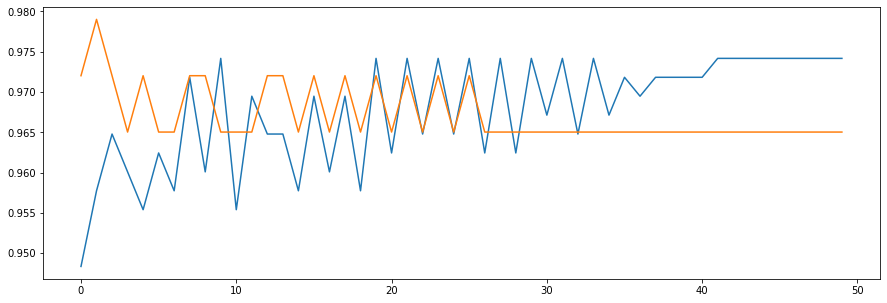

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(train_score)
plt.plot(test_score)
plt.show()